# Implementation of the Frank Rosenblatt's Perceptron using Numpy

### Imports

In [1]:
# Necessary import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(41)

### Generating Dataset

In [2]:
# Number of data points
n = 100

# To generate two linearly separable clusters of data points with two features
mean1 = [2.5, 2.5]
cov1 = [[0.2, 0], [0, 0.2]]
cluster1 = np.random.multivariate_normal(mean1, cov1, n)

mean2 = [4.1, 4.1]
cov2 = [[0.2, 0], [0, 0.2]]
cluster2 = np.random.multivariate_normal(mean2, cov2, n)

# Create the labels
labels=np.concatenate([np.zeros(n),np.ones(n)])

# Combine data points
data = np.vstack((cluster1, cluster2))

# Shuffling & train/test split
shuffle_idx=np.arange(labels.shape[0])
np.random.shuffle(shuffle_idx)

X,y=data[shuffle_idx],labels[shuffle_idx]
X_train,X_test=X[shuffle_idx[:140]],X[shuffle_idx[140:]]
y_train,y_test=y[shuffle_idx[:140]],y[shuffle_idx[140:]]

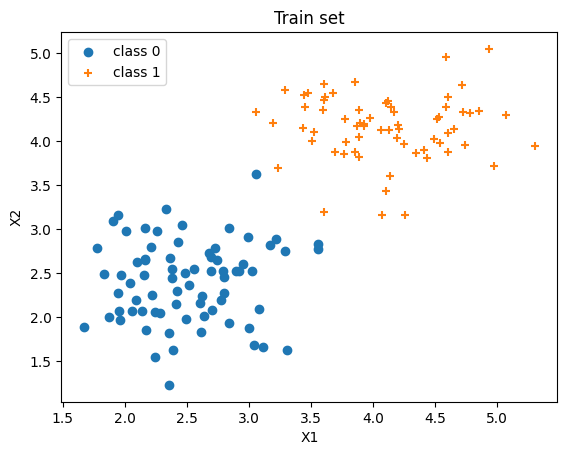

In [3]:
# Plot train set
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],label='class 0', marker='o')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],label='class 1', marker='+')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Train set')
plt.legend()
plt.show()

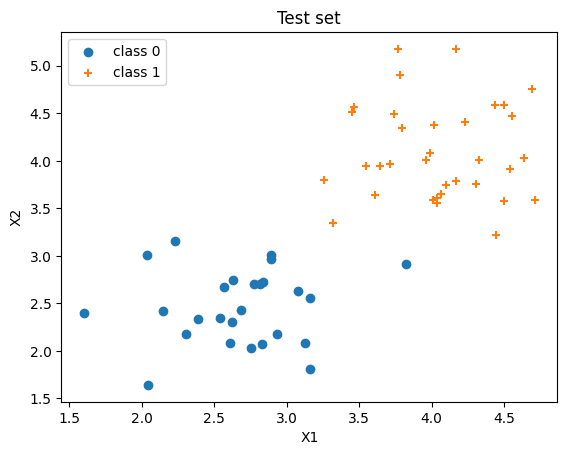

In [4]:
# Plot test set
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],label='class 0', marker='o')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],label='class 1', marker='+')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test set')
plt.legend()
plt.show()

### Perceptron Model Using Numpy

In [5]:
# Defining the perceptron class
class Perceptron():
  def __init__(self, num_features):
    self.num_features= num_features
    self.weights= np.zeros((num_features, 1),dtype=float)
    self.bias= np.zeros(1, dtype=float)

  def forward(self, X):
    net_input= ( X @ self.weights) + self.bias
    prediction = np.where(net_input > 0 , 1 , 0)
    return prediction

  def backward(self , X , y):
    predictions = self.forward(X)
    errors= y- predictions
    return errors

  def train(self , X , y , epochs):
    for epoch in range(epochs):
        for i in range(y.shape[0]):
          errors = self.backward(X[i].reshape(1, self.num_features), y[i]).reshape(-1)
          self.weights += (errors * X[i]).reshape(self.num_features, 1)
          self.bias += errors

  def evaluate(self, X, y):
      predictions = self.forward(X).reshape(-1)
      accuracy = np.sum(predictions == y) / y.shape[0]
      return accuracy

In [6]:
# Model
perceptron_model= Perceptron(num_features=2)

# Train the model
perceptron_model.train(X_train, y_train, epochs=12)
# Evaluate model
train_accuracy = perceptron_model.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_accuracy*100))
test_accuracy= perceptron_model.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_accuracy*100))

Train set accuracy: 100.00%
Test set accuracy: 98.33%


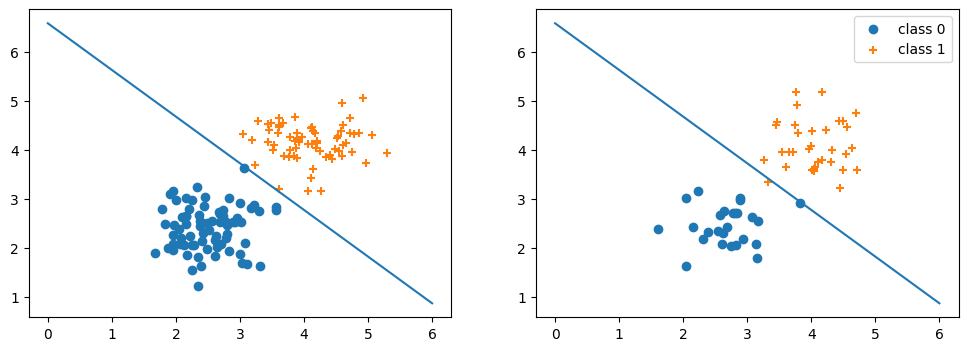

In [7]:
# Plot the Decision Boundary
w, b = perceptron_model.weights, perceptron_model.bias

x0_min = 0
x1_min = ( (-(w[0] * x0_min) - b[0]) / w[1] )

x0_max = 6
x1_max = ( (-(w[0] * x0_max) - b[0]) / w[1] )

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='+')

ax[1].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='+')

ax[1].legend(loc='upper right')
plt.show()